In [1]:
# importing necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ndf = pd.read_excel("/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/KPMG_CLEANED_New_Customers_Data.xlsx")


In [3]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           1000 non-null   int64  
 1   gender                               1000 non-null   object 
 2   past_3_years_bike_related_purchases  1000 non-null   int64  
 3   job_title                            1000 non-null   object 
 4   job_industry_category                1000 non-null   object 
 5   wealth_segment                       1000 non-null   object 
 6   deceased_indicator                   1000 non-null   object 
 7   owns_car                             1000 non-null   object 
 8   tenure                               1000 non-null   int64  
 9   address                              1000 non-null   object 
 10  postcode                             1000 non-null   int64  
 11  state                          

In [4]:
ndf.drop(labels="Unnamed: 0", inplace= True, axis= 1) # axis = 1 means column and 0 means row

In [5]:
ndf.head(3)

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,full_name,age
0,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,Chickie Brister,67
1,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875,Morly Genery,54
2,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875,Ardelis Forrester,50


### For Customer related visualization: 

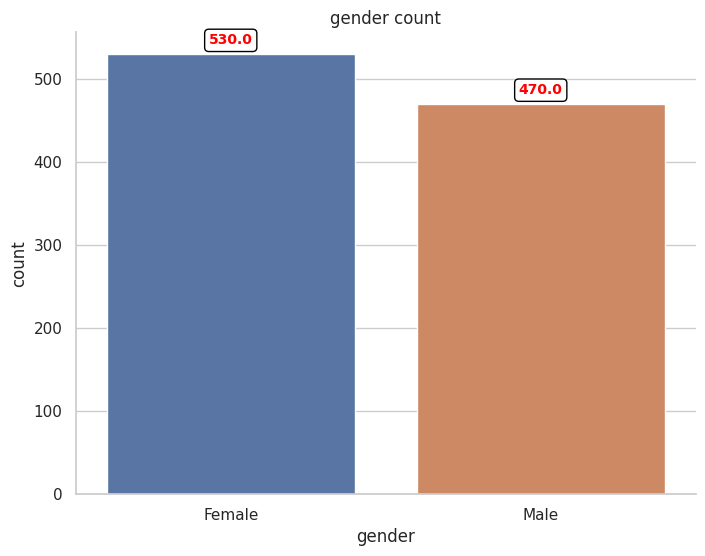

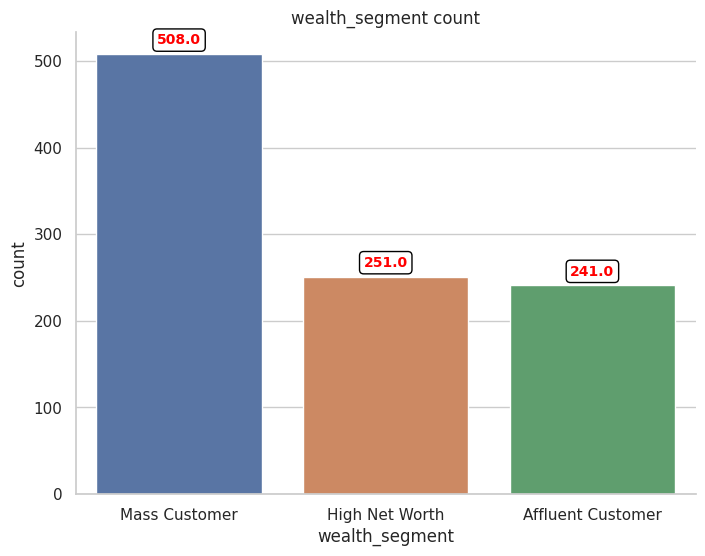

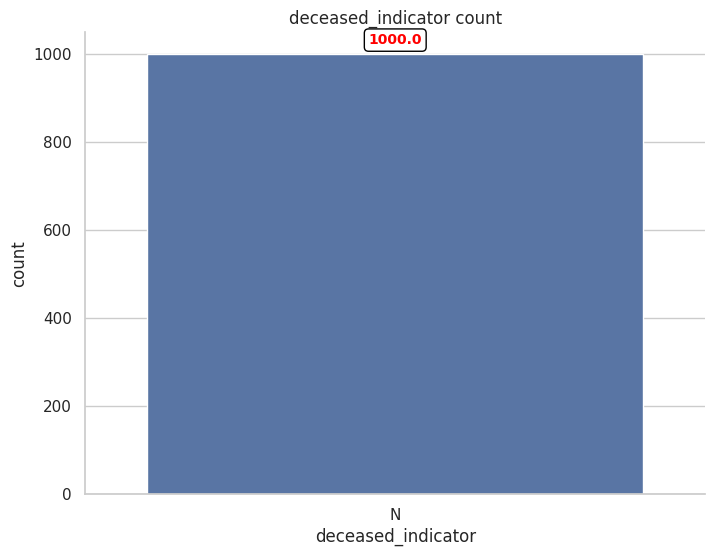

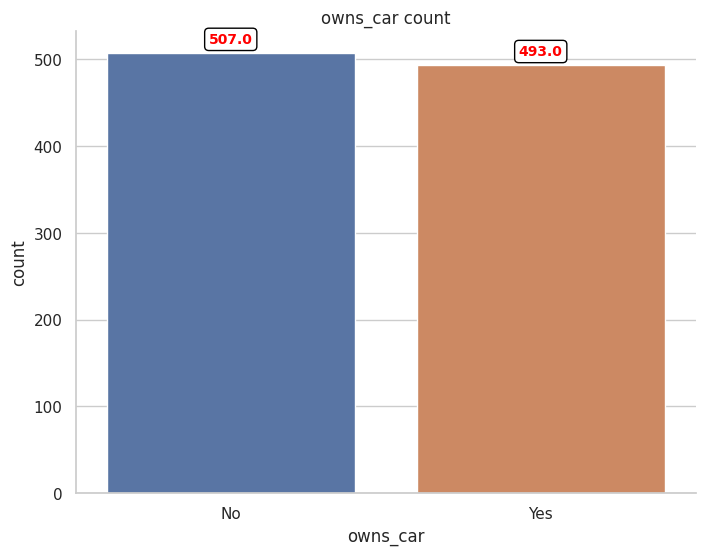

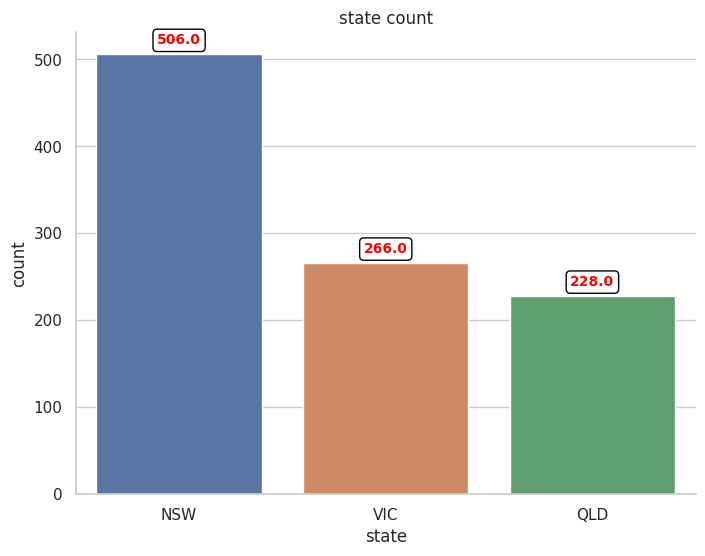

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features
list_of_cat_features = ['gender', 'wealth_segment', 'deceased_indicator', 'owns_car', 'state']

# Function to create countplot for a categorical feature
def count_plot(cat_feature, data):
    plt.figure(figsize=(8, 6))

    sns.set_palette("pastel")  
    sns.set(style="whitegrid")  

    # Create a countplot using Seaborn
    ax = sns.countplot(x=cat_feature, data=data, order=data[cat_feature].value_counts().index)


    for p in ax.patches: 
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                    fontsize=10, color='red', weight='bold',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

 
    sns.despine()
    plt.title(f'{cat_feature} count')
    plt.show()

#--------------------------------------------------------
for cat_feature in list_of_cat_features:
    count_plot(cat_feature=cat_feature, data=ndf)


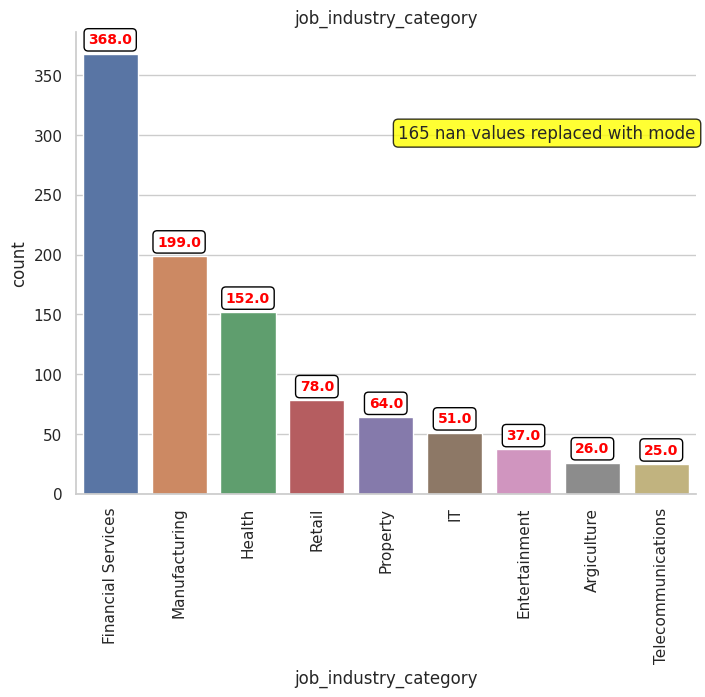

In [7]:
plt.figure(figsize=(8, 6))


sns.set_palette("pastel")  
sns.set(style="whitegrid") 

# Create a countplot using Seaborn
ax = sns.countplot(x='job_industry_category', data=ndf, order=ndf['job_industry_category'].value_counts().index)


for p in ax.patches: 
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=10, color='red', weight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


plt.xticks(rotation= 90)
sns.despine()
plt.text(1, 0.8, f'165 nan values replaced with mode', 
         transform=ax.transAxes, horizontalalignment='right', 
         verticalalignment='top', bbox=dict(facecolor='Yellow',
         edgecolor='black', boxstyle='round,pad=0.3', alpha=0.8))

plt.title('job_industry_category')
plt.show()

---

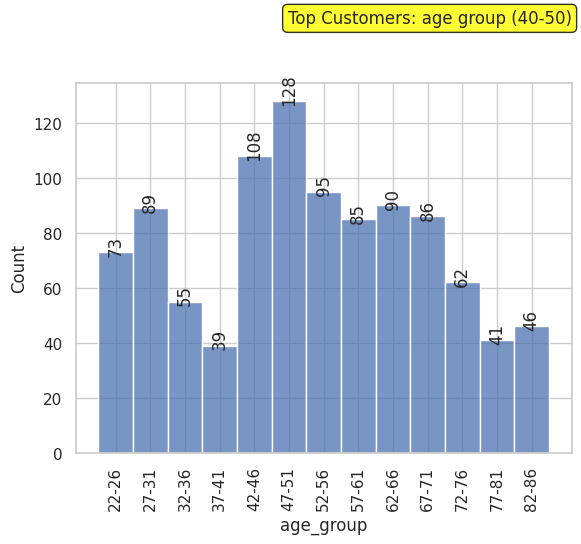

In [8]:

min_age = ndf['age'].min()
max_age = ndf['age'].max()

# Calculate dynamic age bins
age_interval = 5
age_bins = range(min_age, max_age + age_interval + 1, age_interval)


ndf['age_group'] = pd.cut(ndf['age'], 
                                bins=age_bins, 
                                labels=[f'{start}-{end - 1}' for start, end in zip(age_bins[:-1], age_bins[1:])])

ax = sns.histplot(x='age_group', data=ndf, bins=len(age_bins) - 1)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation='vertical')

plt.xticks(rotation=90)
plt.text(1, 1.2, f'Top Customers: age group (40-50)', 
         transform=ax.transAxes, horizontalalignment='right', 
         verticalalignment='top', bbox=dict(facecolor='Yellow',
         edgecolor='black', boxstyle='round,pad=0.3', alpha=0.8))
         
plt.show()


----

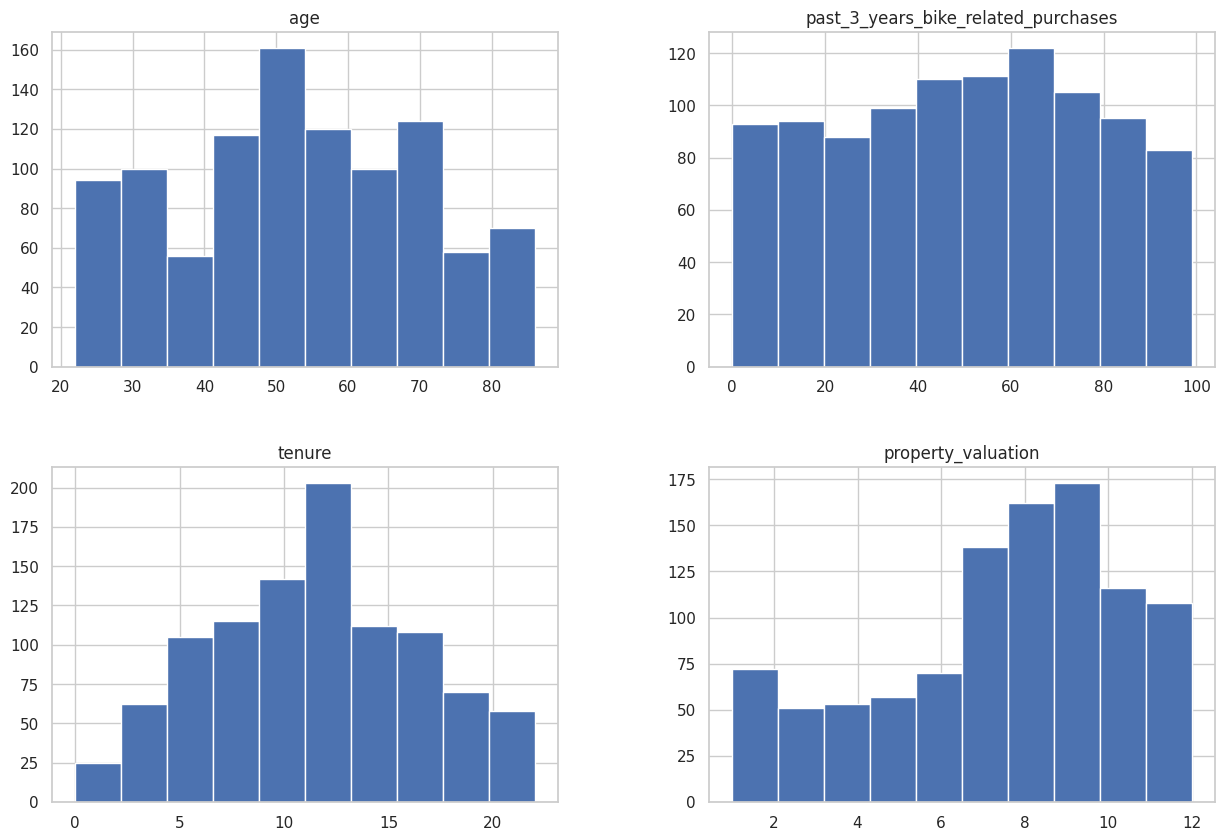

In [9]:
# plot numerical features data distribution:
import matplotlib.pyplot as plt
features_to_plot = ['age', 'past_3_years_bike_related_purchases', 'tenure', 'property_valuation']
ndf[features_to_plot].hist(bins=10, figsize=(15,10))
plt.show()

In [10]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   gender                               1000 non-null   object  
 1   past_3_years_bike_related_purchases  1000 non-null   int64   
 2   job_title                            1000 non-null   object  
 3   job_industry_category                1000 non-null   object  
 4   wealth_segment                       1000 non-null   object  
 5   deceased_indicator                   1000 non-null   object  
 6   owns_car                             1000 non-null   object  
 7   tenure                               1000 non-null   int64   
 8   address                              1000 non-null   object  
 9   postcode                             1000 non-null   int64   
 10  state                                1000 non-null   object  
 11  country           

In [12]:
numerical_features = ndf.columns[ndf.dtypes != 'object']
categorical_features = ndf.columns[ndf.dtypes == 'object']

print(f"Numerical columns: {numerical_features} \n-----------\ncategorical columns: {categorical_features}")

Numerical columns: Index(['past_3_years_bike_related_purchases', 'tenure', 'postcode',
       'property_valuation', 'Rank', 'Value', 'age', 'age_group'],
      dtype='object') 
-----------
categorical columns: Index(['gender', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'address', 'state', 'country',
       'full_name'],
      dtype='object')


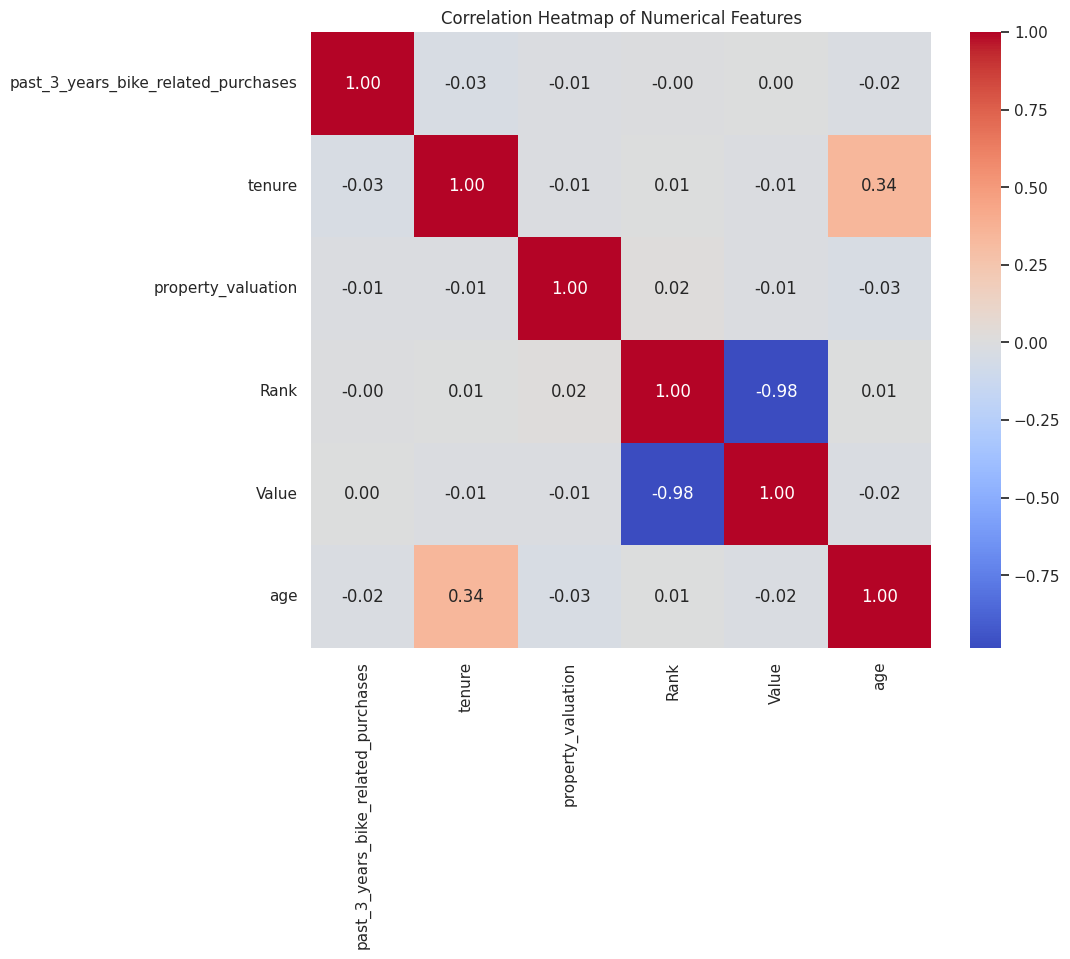

In [14]:
# Calculate correlation matrix

correlation_matrix = ndf[numerical_features.drop(labels=['age_group', 'postcode'])].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- there is slight positive correlation between `age` and `tenure`. 

- There is strong negative correlation between `rank` and `value`. 

----------